## Setting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **문제 1:** Numpy Array 다루기

In [2]:
import numpy as np

**1-1.** 크기가 3인 1차원 Numpy Array를 생성하여 arr1이라는 이름으로 저장하고 출력해보세요.

In [3]:
arr1 = np.array([1, 2, 3])
print(arr1)

[1 2 3]


**1-2.** 3x3 크기의 2차원 행렬을 Numpy Array로 생성하여 mat1이라는 이름으로 저장하고 출력해보세요.

In [4]:
mat1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(mat1)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


**1-3.** mat1의 전치행렬을 출력해보세요.

In [5]:
print(mat1.T)

[[1 4 7]
 [2 5 8]
 [3 6 9]]


**1-4.** arr1과 mat1의 각 원소를 더한 결과를 출력해보세요. *(hint: reshape)*

In [6]:
arr1.reshape(3, 1) + mat1

array([[ 2,  3,  4],
       [ 6,  7,  8],
       [10, 11, 12]])

## **문제 2:** 그래프 그리기

In [7]:
import matplotlib.pyplot as plt

**2-1.** 0에서 10까지 0.1 간격으로 숫자를 생성하고, 해당 숫자들의 sin값과 cos값을 구하여 선 그래프로 그려보세요.

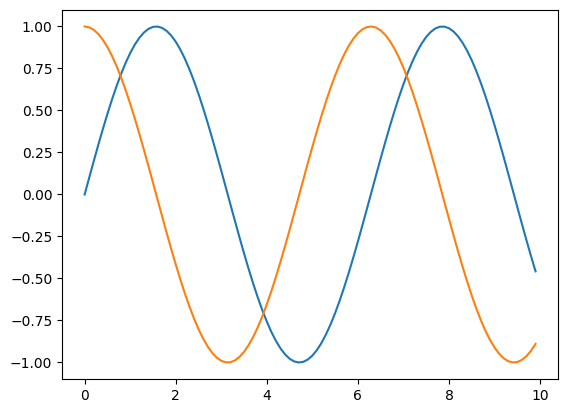

In [8]:
x = np.arange(0, 10, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

**2-2.** 위 그래프에 제목, x축 라벨, y축 라벨을 추가해보세요.

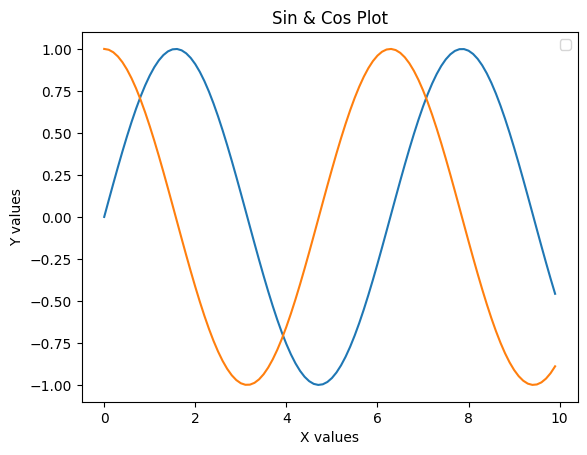

In [9]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.title("Sin & Cos Plot")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

**2-3.** 위 그래프에 해당 숫자들의 코사인 값을 빨간색 점선으로 변경해보세요.

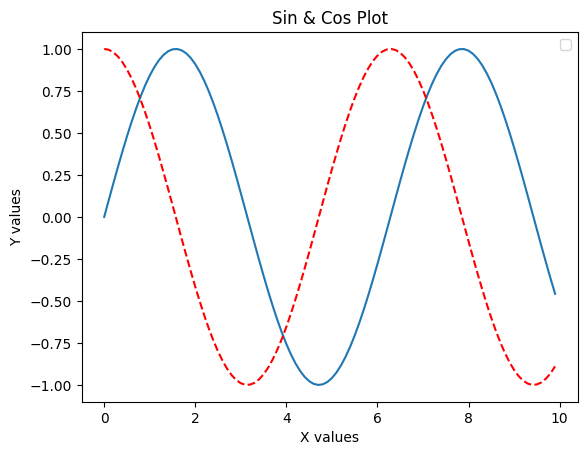

In [10]:
plt.plot(x, y1)
plt.plot(x, y2, 'r--')
plt.title("Sin & Cos Plot")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

**2-4.** 위 그래프에 범례(legend)를 추가해보세요.

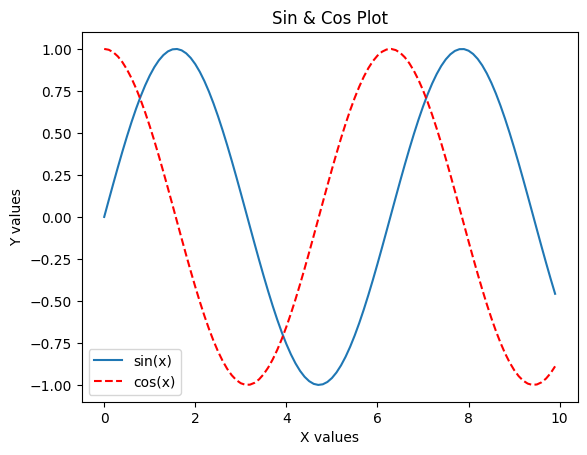

In [11]:
plt.plot(x, y1, label="sin(x)")
plt.plot(x, y2, 'r--', label="cos(x)")
plt.title("Sin & Cos Plot")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

**2-5.** 위 그래프를 "sin_cos_plot.png"라는 이름으로 저장해보세요.

In [12]:
plt.savefig("sin_cos_plot.png")

<Figure size 640x480 with 0 Axes>

## **문제 3**: Keras로 아키텍쳐 표현

In [13]:
from tensorflow import keras
from keras import layers

**3-1.** Keras의 Sequential API를 사용하여, 입력 노드가 10개이고 출력 노드가 3개이며, 활성화 함수는 ReLU인 퍼셉트론을 만들어보세요.

In [14]:
model = keras.Sequential()
model.add(layers.Dense(3, input_dim=10, activation='relu'))

**3-2.** 출력 노드가 20개이고, 활성화 함수가 ReLU인 hidden layer를 추가해보세요.

In [15]:
model.add(layers.Dense(20, activation='relu'))

**3-3.** 모델의 구조를 model.summary()를 통해 확인해보세요.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 33        
                                                                 
 dense_1 (Dense)             (None, 20)                80        
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **문제 4:** MNIST 데이터셋 예측하기

In [17]:
from keras.datasets import mnist
from keras.utils import to_categorical

# MNIST 데이터 불러오기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 데이터 스케일링
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# 레이블을 범주형으로 변환
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**4-1.** 전체 train 데이터를 train set과 valid set으로 나누세요. (valid set 비율은 0.2)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

**4-2.** Keras를 사용하여 아래의 구조를 가진 모델을 구성하세요.  
- 입력층: 784개의 뉴런 (28x28 픽셀)
- 은닉층: 128개의 뉴런과 ReLU 활성화 함수
- 출력층: 10개의 뉴런 (숫자 0-9)과 Softmax 활성화 함수

In [20]:
from keras import models

In [21]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

**4-3.** 구성한 모델을 컴파일하세요. 이때, 손실함수로 Categorical Crossentropy를 사용하고, 최적화 알고리즘으로는 Adam을 사용하세요. 또한, 성능 지표로 accuracy를 사용하세요.

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**4-4.** 모델을 학습시키세요. (에포크는 10회, 배치 사이즈는 32로 설정, train&validation 데이터셋 사용)

In [23]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 26s 14ms/step - loss: 0.2833 - accuracy: 0.9183 - val_loss: 0.1716 - val_accuracy: 0.9508
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1300 - accuracy: 0.9617 - val_loss: 0.1125 - val_accuracy: 0.9671
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0876 - accuracy: 0.9734 - val_loss: 0.0981 - val_accuracy: 0.9722
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0647 - accuracy: 0.9804 - val_loss: 0.0853 - val_accuracy: 0.9750
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0496 - accuracy: 0.9855 - val_loss: 0.0878 - val_accuracy: 0.9735
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0394 - accuracy: 0.9883 - val_loss: 0.0832 - val_accuracy: 0.9748
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0303 - accuracy: 0.9907 - val_loss: 0.0787 - val_ac

**4-5.** 학습 과정에서의 accuracy와 loss의 변화를 그래프로 시각화하세요.

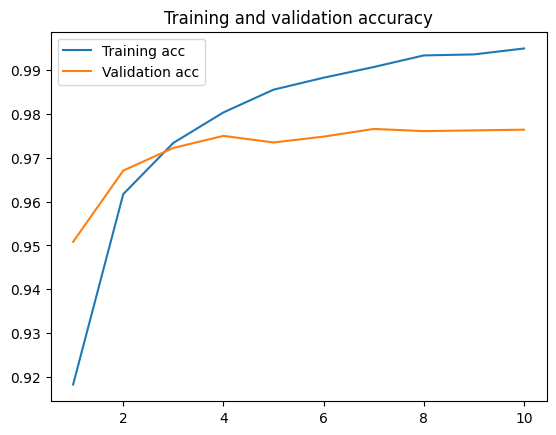

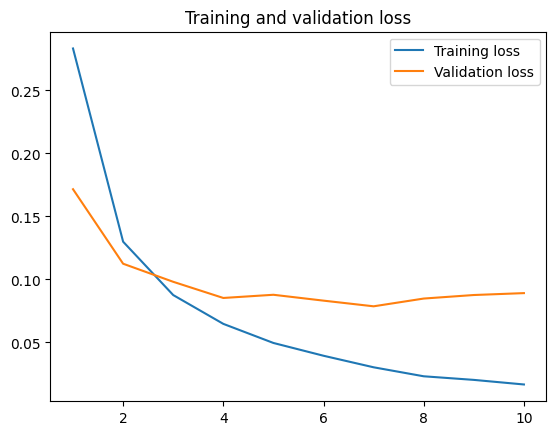

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**4-6.** 학습된 모델을 test 데이터셋으로 평가하고, 몇몇 샘플에 대한 모델의 예측을 출력하세요.

In [25]:
`test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.9749
Test Accuracy: 0.9749000072479248


In [26]:
predictions = model.predict(test_images)

for i in range(5):
    print("Predicted Label:", np.argmax(predictions[i]))
    print("True Label:", np.argmax(test_labels[i]))

313/313 [==============================] - 1s 2ms/step
Predicted Label: 7
True Label: 7
Predicted Label: 2
True Label: 2
Predicted Label: 1
True Label: 1
Predicted Label: 0
True Label: 0
Predicted Label: 4
True Label: 4
